# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import tweepy
import seaborn as sns
import re
%matplotlib inline

df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [498]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [499]:
from timeit import default_timer as timer

consumer_key = 'S2YEp2KrcsJM617bX2rmdkStk'
consumer_secret = 'dcFDiFfiG7fN8BtCxxSOQ0wkv0dBH1Qx9KpqDaexiTzlslsJw9'
access_token = '1104014451689308166-3Xg3Qr7yJDlYqpShm4BQfP2VTeMMOY'
access_secret = '6E56XpYm2iBHANwydW5U0EIfpq4kpC3ouY1G9MV8YSmUK'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df.tweet_id.values
tweet_id_fails = {}

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888078434458587136
Success
21: 887705289381826560
Success
22: 887517139158093824
Success
23: 887473957103951883
Success
24: 887343217045368832
Success
25: 887101392804085760
Success
26: 886983233522544640
Success
27: 886736880519319552
Success
28: 886680336477933568
Success
29: 886366144734445568
Success
30: 886258384151887873
Success
31: 885984800019947520
Success
32: 885528943205470208
Success
33: 8851676198836

Success
261: 831262627380748289
Success
262: 830956169170665475
Success
263: 830583320585068544
Success
264: 830097400375152640
Success
265: 829861396166877184
Success
266: 829501995190984704
Success
267: 829449946868879360
Success
268: 829141528400556032
Success
269: 829011960981237760
Success
270: 828770345708580865
Success
271: 828708714936930305
Success
272: 828650029636317184
Success
273: 828409743546925057
Success
274: 828408677031882754
Success
275: 828381636999917570
Success
276: 828376505180889089
Success
277: 828372645993398273
Success
278: 828046555563323392
Success
279: 828011680017821696
Success
280: 827933404142436356
Success
281: 827653905312006145
Success
282: 827600520311402496
Success
283: 827324948884643840
Success
284: 827199976799354881
Success
285: 826958653328592898
Success
286: 826848821049180160
Success
287: 826598365270007810
Success
288: 826476773533745153
Success
289: 826240494070030336
Success
290: 826204788643753985
Success
291: 826115272272650244
Success


Success
518: 783391753726550016
Success
519: 783334639985389568
Success
520: 783085703974514689
Success
521: 782969140009107456
Success
522: 782747134529531904
Success
523: 782722598790725632
Success
524: 782598640137187329
Success
525: 782305867769217024
Success
526: 781955203444699136
Success
527: 781661882474196992
Success
528: 781524693396357120
Success
529: 781251288990355457
Success
530: 781163403222056960
Success
531: 780931614150983680
Success
532: 780858289093574656
Success
533: 780800785462489090
Success
534: 780601303617732608
Success
535: 780543529827336192
Success
536: 780459368902959104
Success
537: 780192070812196864
Success
538: 779834332596887552
Success
539: 779377524342161408
Success
540: 779056095788752897
Success
541: 778990705243029504
Success
542: 778748913645780993
Success
543: 778650543019483137
Success
544: 778624900596654080
Success
545: 778408200802557953
Success
546: 778383385161035776
Success
547: 778286810187399168
Success
548: 778039087836069888
Success


Rate limit reached. Sleeping for: 307


Success
741: 747844099428986880
Success
742: 747816857231626240
Success
743: 747600769478692864
Success
744: 747594051852075008
Success
745: 747512671126323200
Success
746: 747461612269887489
Success
747: 747219827526344708
Success
748: 747204161125646336
Success
749: 747103485104099331
Success
750: 746906459439529985
Success
751: 746872823977771008
Success
752: 746818907684614144
Success
753: 746790600704425984
Success
754: 746726898085036033
Success
755: 746507379341139972
Success
756: 746369468511756288
Success
757: 746131877086527488
Success
758: 746056683365994496
Success
759: 745789745784041472
Success
760: 745712589599014916
Success
761: 745433870967832576
Success
762: 745422732645535745
Success
763: 745314880350101504
Success
764: 745057283344719872
Success
765: 744995568523612160
Success
766: 744971049620602880
Success
767: 744709971296780288
Success
768: 744334592493166593
Success
769: 744234799360020481
Success
770: 743980027717509120
Success
771: 743895849529389061
Success


Success
998: 708026248782585858
Success
999: 707995814724026368
Success
1000: 707969809498152960
Success
1001: 707776935007539200
Success
1002: 707741517457260545
Success
1003: 707693576495472641
Success
1004: 707610948723478529
Success
1005: 707420581654872064
Success
1006: 707411934438625280
Success
1007: 707387676719185920
Success
1008: 707377100785885184
Success
1009: 707315916783140866
Success
1010: 707297311098011648
Success
1011: 707059547140169728
Success
1012: 707038192327901184
Success
1013: 707021089608753152
Success
1014: 707014260413456384
Success
1015: 706901761596989440
Success
1016: 706681918348251136
Success
1017: 706644897839910912
Success
1018: 706593038911545345
Success
1019: 706538006853918722
Success
1020: 706516534877929472
Success
1021: 706346369204748288
Success
1022: 706310011488698368
Success
1023: 706291001778950144
Success
1024: 706265994973601792
Success
1025: 706166467411222528
Success
1026: 705975130514706432
Success
1027: 705970349788291072
Success
1028

Success
1247: 687460506001633280
Success
1248: 687317306314240000
Success
1249: 687312378585812992
Success
1250: 687127927494963200
Success
1251: 687124485711986689
Success
1252: 687109925361856513
Success
1253: 687102708889812993
Success
1254: 687096057537363968
Success
1255: 686947101016735744
Success
1256: 686749460672679938
Success
1257: 686730991906516992
Success
1258: 686683045143953408
Success
1259: 686618349602762752
Success
1260: 686606069955735556
Success
1261: 686386521809772549
Success
1262: 686377065986265092
Success
1263: 686358356425093120
Success
1264: 686050296934563840
Success
1265: 686034024800862208
Success
1266: 686007916130873345
Success
1267: 686003207160610816
Success
1268: 685973236358713344
Success
1269: 685943807276412928
Success
1270: 685906723014619143
Success
1271: 685667379192414208
Success
1272: 685663452032069632
Success
1273: 685641971164143616
Success
1274: 685547936038666240
Success
1275: 685532292383666176
Success
1276: 685325112850124800
Success
12

Success
1496: 675706639471788032
Success
1497: 675534494439489536
Success
1498: 675531475945709568
Success
1499: 675522403582218240
Success
1500: 675517828909424640
Success
1501: 675501075957489664
Success
1502: 675497103322386432
Success
1503: 675489971617296384
Success
1504: 675483430902214656
Success
1505: 675432746517426176
Success
1506: 675372240448454658
Success
1507: 675362609739206656
Success
1508: 675354435921575936
Success
1509: 675349384339542016
Success
1510: 675334060156301312
Success
1511: 675166823650848770
Success
1512: 675153376133427200
Success
1513: 675149409102012420
Success
1514: 675147105808306176
Success
1515: 675146535592706048
Success
1516: 675145476954566656
Success
1517: 675135153782571009
Success
1518: 675113801096802304
Success
1519: 675111688094527488
Success
1520: 675109292475830276
Success
1521: 675047298674663426
Success
1522: 675015141583413248
Success
1523: 675006312288268288
Success
1524: 675003128568291329
Success
1525: 674999807681908736
Success
15

Rate limit reached. Sleeping for: 343


Success
1641: 672475084225949696
Success
1642: 672466075045466113
Success
1643: 672272411274932228
Success
1644: 672267570918129665
Success
1645: 672264251789176834
Success
1646: 672256522047614977
Success
1647: 672254177670729728
Success
1648: 672248013293752320
Success
1649: 672245253877968896
Success
1650: 672239279297454080
Success
1651: 672231046314901505
Success
1652: 672222792075620352
Success
1653: 672205392827572224
Success
1654: 672169685991993344
Success
1655: 672160042234327040
Success
1656: 672139350159835138
Success
1657: 672125275208069120
Success
1658: 672095186491711488
Success
1659: 672082170312290304
Success
1660: 672068090318987265
Success
1661: 671896809300709376
Success
1662: 671891728106971137
Success
1663: 671882082306625538
Success
1664: 671879137494245376
Success
1665: 671874878652489728
Success
1666: 671866342182637568
Success
1667: 671855973984772097
Success
1668: 671789708968640512
Success
1669: 671768281401958400
Success
1670: 671763349865160704
Success
16

Success
1890: 667766675769573376
Success
1891: 667728196545200128
Success
1892: 667724302356258817
Success
1893: 667549055577362432
Success
1894: 667546741521195010
Success
1895: 667544320556335104
Success
1896: 667538891197542400
Success
1897: 667534815156183040
Success
1898: 667530908589760512
Success
1899: 667524857454854144
Success
1900: 667517642048163840
Success
1901: 667509364010450944
Success
1902: 667502640335572993
Success
1903: 667495797102141441
Success
1904: 667491009379606528
Success
1905: 667470559035432960
Success
1906: 667455448082227200
Success
1907: 667453023279554560
Success
1908: 667443425659232256
Success
1909: 667437278097252352
Success
1910: 667435689202614272
Success
1911: 667405339315146752
Success
1912: 667393430834667520
Success
1913: 667369227918143488
Success
1914: 667211855547486208
Success
1915: 667200525029539841
Success
1916: 667192066997374976
Success
1917: 667188689915760640
Success
1918: 667182792070062081
Success
1919: 667177989038297088
Success
19

In [500]:
# json.loads can't read all the json data at once, so need to read each line into a list first
tweet_list = []
with open('tweet_json.txt') as json_file: 
    for line in json_file:
        tweet_list.append(json.loads(line))

# create a dictionary of tweets based on the list above, and add each dict to a new list
tweets = []
for tweet in tweet_list:
    tweets.append({'id': tweet['id'],
                    'retweet_count': tweet['retweet_count'],
                    'favorite_count': tweet['favorite_count']})


In [501]:
# build the pandas data frame using the list of dictionaries
df_tweets = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])
df_tweets = df_tweets.sort_values('id').reset_index(drop=True)

In [502]:
df_images = pd.read_csv('image-predictions.tsv', sep='\t')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [503]:
df_archive.shape[0], df_tweets.shape[0], df_images.shape[0]

(2356, 1986, 2075)

Not all the entries in `df_archive` will have matching favourite/retweet counts and image classifications from the other datasets.

In [504]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [505]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [506]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [507]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [508]:
# checking if tweet text is duplicated
df_archive[df_archive.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


None of the tweets are duplicated

In [509]:
# investigating records who retweeted_status_id is not null, to confirm they are retweets
df_archive[df_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [510]:
# from describe() we saw an unusually large max numerator, investigating it
df_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [511]:
# from describe() we saw an unusually large max denominator, investigating it
df_archive.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [512]:
# counting the number of records that haven't been identified as a dog within the main archive.
df_archive.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [513]:
# looking for records which have doggo in their text, but have been misclassified
df_archive[(df_archive['text'].str.contains('doggo')) & (df_archive['doggo'] == 'None')].shape[0]

10

In [514]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(df_archive[(df_archive['text'].str.contains('doggo')) & (df_archive['doggo'] == 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])

,text,name,doggo,floofer,pupper,puppo
83,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,None,None,None,None,None
268,Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,None,None,None,None,None
302,"RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",None,None,None,None,None
475,RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…,Jack,None,None,None,None
477,Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,Jack,None,None,None,None
798,You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,None,None,None,None,None
934,Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf,None,None,None,None,None
946,Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,None,None,None,None,None
987,This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,Dietrich,None,None,None,None
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,this,None,None,None,None


In [515]:
# looking for records which have floofer in their text, but have been misclassified
df_archive[(df_archive['text'].str.contains('floofer')) & (df_archive['floofer'] == 'None')].shape[0]


0

In [516]:
# looking for records which have pupper in their text, but have been misclassified
df_archive[(df_archive['text'].str.contains('pupper')) & (df_archive['pupper'] == 'None')].shape[0]

24

In [517]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(df_archive[(df_archive['text'].str.contains('pupper')) & (df_archive['pupper'] == 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])

,text,name,doggo,floofer,pupper,puppo
54,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,Gary,None,None,None,None
993,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,one,None,None,None,None
1027,This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,Arlen,None,None,None,None
1093,Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC,None,None,None,None,None
1220,Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,None,None,None,None,None
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,None,None,None,None,None
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,None,None,None,None,None
1265,"WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",None,None,None,None,None
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,a,None,None,None,None
1516,This golden is happy to refute the soft mouth egg test. Not a fan of sweeping generalizations. 11/10 #notallpuppers https://t.co/DgXYBDMM3E,None,None,None,None,None


In [518]:
# looking for records which have puppo in their text, but have been misclassified
df_archive[(df_archive['text'].str.contains('puppo')) & (df_archive['puppo'] == 'None')].shape[0]

8

In [519]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(df_archive[(df_archive['text'].str.contains('puppo')) & (df_archive['puppo'] == 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])

,text,name,doggo,floofer,pupper,puppo
85,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",Venti,None,None,None,None
106,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,Lassie,None,None,None,None
134,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,Lili,None,None,None,None
172,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,None,doggo,None,None,None
228,Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,None,None,None,None,None
274,@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,None,None,None,None,None
296,This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,Lucy,None,None,None,None
545,This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,Duke,None,None,None,None


In [520]:
# looking for records identified as doggo, but don't actually contain it in their text
df_archive[(~df_archive['text'].str.contains('doggo')) & (df_archive['doggo'] != 'None')].shape[0]

9

In [521]:
with option_context('display.max_colwidth', 400):
    display(df_archive[(~df_archive['text'].str.contains('doggo')) & (df_archive['doggo'] != 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])


,text,name,doggo,floofer,pupper,puppo
323,DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0,None,doggo,None,None,None
446,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,None,None,None
447,RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,Sunny,doggo,None,None,None
448,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,Sunny,doggo,None,None,None
449,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,None,None,None
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",None,doggo,None,pupper,None
807,Doggo will persevere. 13/10\nhttps://t.co/yOVzAomJ6k,None,doggo,None,None,None
945,Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10 https://t.co/bWSgqnwSHr,None,doggo,None,None,None
989,Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet https://t.co/BbcABzohKb,Divine,doggo,None,None,None


Appears to only be a capitalisation issue, thus correctly identifed.

In [522]:
# looking for records identified as floofer, but don't actually contain it in their text
df_archive[(~df_archive['text'].str.contains('floofer')) & (df_archive['floofer'] != 'None')].shape[0]

6

In [523]:
with option_context('display.max_colwidth', 400):
    display(df_archive[(~df_archive['text'].str.contains('floofer')) & (df_archive['floofer'] != 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])


,text,name,doggo,floofer,pupper,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",None,doggo,floofer,None,None
984,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,Blu,None,floofer,None,None
1091,Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af https://t.co/CaG9MzD3WT,None,None,floofer,None,None
1110,This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL,Moose,None,floofer,None,None
1534,Here we are witnessing a rare High Stepping Alaskan Floofer. 12/10 dangerously petable (vid by @TheMrsNux) https://t.co/K4s9IJh2jm,None,None,floofer,None,None
1614,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF,Petrick,None,floofer,None,None


Appears to only be a capitalisation issue, thus correctly identifed.

In [524]:
# looking for records identified as pupper, but don't actually contain it in their text
df_archive[(~df_archive['text'].str.contains('pupper')) & (df_archive['pupper'] != 'None')].shape[0]

9

In [525]:
with option_context('display.max_colwidth', 400):
    display(df_archive[(~df_archive['text'].str.contains('pupper')) & (df_archive['pupper'] != 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])


,text,name,doggo,floofer,pupper,puppo
281,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,None,None,None,pupper,None
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",Dido,doggo,None,pupper,None
556,Pupper hath acquire enemy. 13/10 https://t.co/ns9qoElfsX,None,None,None,pupper,None
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",None,doggo,None,pupper,None
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,Sophie,None,None,pupper,None
996,SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek https://t.co/QGGhZoTcwy,None,None,None,pupper,None
1049,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a,None,None,pupper,None
1410,HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe,None,None,None,pupper,None
1985,This is Cheryl AKA Queen Pupper of the Skies. Experienced fighter pilot. Much skill. True hero. 11/10 https://t.co/i4XJEWwdsp,Cheryl,None,None,pupper,None


Appears to only be a capitalisation issue, thus correctly identifed.

In [526]:
# looking for records identified as puppo, but don't actually contain it in their text
df_archive[(~df_archive['text'].str.contains('puppo')) & (df_archive['puppo'] != 'None')].shape[0]

1

In [527]:
with option_context('display.max_colwidth', 400):
    display(df_archive[(~df_archive['text'].str.contains('puppo')) & (df_archive['puppo'] != 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])


,text,name,doggo,floofer,pupper,puppo
71,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,Snoopy,None,None,None,puppo


Appears to only be a capitalisation issue, thus correctly identifed.

In [528]:
# Checking to see if any text starts with 'This is {name}' but then has misclassified `name` as `None`
with option_context('display.max_colwidth', 400):
    display(df_archive[(df_archive['text'].str.contains('This is')) & (df_archive['name'] == 'None')][['text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']])


,text,name,doggo,floofer,pupper,puppo


No such records

In [529]:
df_tweets.head()

,id,retweet_count,favorite_count
0,666020888022790149,435,2315
1,666029285002620928,40,115
2,666033412701032449,37,102
3,666044226329800704,118,252
4,666049248165822465,37,91


In [530]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              1986 non-null   int64
 1   retweet_count   1986 non-null   int64
 2   favorite_count  1986 non-null   int64
dtypes: int64(3)
memory usage: 46.7 KB


In [531]:
df_tweets.describe()

,id,retweet_count,favorite_count
count,1.986000e+03,1986.000000,1986.000000
mean,7.356142e+17,2292.178248,7855.915408
std,6.740686e+16,4103.734222,11582.179626
min,6.660209e+17,11.000000,67.000000
25%,6.758214e+17,511.250000,1675.000000
50%,7.082494e+17,1108.000000,3530.000000
75%,7.873791e+17,2608.000000,9736.250000
max,8.924206e+17,72321.000000,147543.000000


In [583]:
# investigating the large maximum favourite_count
df_tweets[df_tweets.favorite_count == 147543]

,id,retweet_count,favorite_count
1217,744234799360020481,72321,147543


In [533]:
df_archive[df_archive.tweet_id == 744234799360020481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None


In [534]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [535]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [536]:
# investigating records that are never identified as a dog
df_images.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### Quality issues
1. `df_archive` has 28 more records than what we got from the API and 281 more records that the image classifications data set. `df_images` - 324 records are never identified as a dog, for any of the images available. This means that some tweets won't have a retweet and favourite count, nor image classification. We can exclude any records that don't exist in all the tables.

2. `df_archive` -`timestamp` should be datetime; `retweet_count` and `favorite_count` should be integers, not floats; The ID fields, like `tweet_id`, `in_reply_to_status_id` etc. should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.

3. `rating_numerator` and `rating_denominator` should be converted to a float and re-extracted as there are anomolous values in these fields.

4. `df_archive` - 181 records have a `retweeted_status_id`, meaning that they are retweets, we should exclude these.

5. `df_archive` - `tweet_id` 835246439529840640 had two ratings, first one being invalid but chosen as the numerator and denominator. We can correct this.

6. `df_archive` - 10 records where `doggos` was used instead of `doggo` and these weren't picked up as a Doggo. 24 records where `puppers` was used instead of `pupper` and these weren't picked up as a Pupper. 8 records where `puppo` was used within a broader string, but was identified as `None`.

7. There are records with multiple dog stages listed, these should be cleaned up.


8. `df_archive` The ID fields, like `tweet_id`, `in_reply_to_status_id` etc. should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.

9. `df_archive` Dog Names: In the name column, there are several values that are not dog names, like 'a', 'the', 'such', etc. All of these observations have lowercase characters, an important pattern that could be used to clean up this field. Another way is to drop duplicated values.

### Tidiness issues
1. `df_archive` - `doggo`, `floofer`, `pupper` and `puppo` columns should be melted to a `dog_type` column.

2. From `df_tweets` we can add `retweet_count` and `favourite_count` to `df_archive` and from `df_images` we can add all columns to `df_archive`. No need to have these values in a seperate data frames as it will lead to unneccessary joining when analysing the data. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [597]:
# Make copies of original pieces of data
df_archive_cleaned = df_archive.copy()
df_tweets_cleaned = df_tweets.copy()
df_images_cleaned = df_images.copy()

### Issue 1

#### Define
Unpivot all the dog stage columns into a single `dog_stage` column. In doing so, we can handle `None` values and also handle situation where multiple dog stages exist for the same dog.

#### Code

In [598]:
# handle none
df_archive_cleaned.doggo.replace('None', '', inplace=True)
df_archive_cleaned.floofer.replace('None', '', inplace=True)
df_archive_cleaned.pupper.replace('None', '', inplace=True)
df_archive_cleaned.puppo.replace('None', '', inplace=True)

# merge into column
df_archive_cleaned['dog_stage'] = df_archive_cleaned.doggo + df_archive_cleaned.floofer + df_archive_cleaned.pupper + df_archive_cleaned.puppo

# handle multiple stages
df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_archive_cleaned.loc[df_archive_cleaned.dog_stage == '', 'dog_stage'] = np.nan

# drop unneccessary dog type columns
df_archive_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


#### Test

In [599]:
df_archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [600]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggo, puppo', ['text','dog_stage']])

,text,dog_stage
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,"doggo, puppo"


In [601]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggo, pupper', ['text','dog_stage']])

,text,dog_stage
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7","doggo, pupper"
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,"doggo, pupper"
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze","doggo, pupper"
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"doggo, pupper"
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"doggo, pupper"
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u","doggo, pupper"
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda","doggo, pupper"
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,"doggo, pupper"
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","doggo, pupper"
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,"doggo, pupper"


In [602]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggo, floofer', ['text','dog_stage']])

,text,dog_stage
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","doggo, floofer"


### Issue 2

#### Define
Parse the text column to make sure that all the dog types have been flagged correctly, as there were a selection that were missed. 

#### Code

In [603]:
print(f'#doggo: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo"].shape[0]}')
print(f'#pupper: {df_archive_cleaned[df_archive_cleaned.dog_stage == "pupper"].shape[0]}')
print(f'#puppo: {df_archive_cleaned[df_archive_cleaned.dog_stage == "puppo"].shape[0]}')
print(f'#floofer: {df_archive_cleaned[df_archive_cleaned.dog_stage == "floofer"].shape[0]}')
print(f'#doggo, floofer: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo, floofer"].shape[0]}')
print(f'#doggo, pupper: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo, pupper"].shape[0]}')
print(f'#doggo, puppo: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo, puppo"].shape[0]}')

#doggo: 83
#pupper: 245
#puppo: 29
#floofer: 9
#doggo, floofer: 1
#doggo, pupper: 12
#doggo, puppo: 1


In [604]:
# although we've already melted the dog stages, it was noted that certain classifications were missed due 
# to capitalisation of the dog stages, so we are re-parsing the text field and temporarily converting all 
# text to lowercase so that nothing is missing.
# order of if statements is important here, so that the correctly capture previous 
# items where multiple dig stages were specified

def check_text_for_dog_type(row):
    row['text'] = row['text'].lower()
    if 'doggo' in row['text'] and 'floofer' in row['text']:
        return 'doggo, floofer'
    if 'doggo' in row['text'] and 'pupper' in row['text']:
        return 'doggo, pupper'
    if 'doggo' in row['text'] and 'puppo' in row['text']:
        return 'doggo, puppo'
    if 'doggo' in row['text']:
        return 'doggo'
    if 'pupper' in row['text']:
        return 'pupper'
    if 'puppo' in row['text']:
        return 'puppo'
    if 'floofer' in row['text']:
        return 'floofer'    

df_archive_cleaned['dog_stage'] = df_archive_cleaned.apply(check_text_for_dog_type, axis=1)

In [605]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggo, pupper', ['text','dog_stage']])

,text,dog_stage
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7","doggo, pupper"
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,"doggo, pupper"
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze","doggo, pupper"
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"doggo, pupper"
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"doggo, pupper"
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u","doggo, pupper"
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda","doggo, pupper"
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,"doggo, pupper"
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","doggo, pupper"
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,"doggo, pupper"


In [606]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggo, floofer', ['text','dog_stage']])

,text,dog_stage
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","doggo, floofer"


In [607]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned.loc[df_archive_cleaned.dog_stage == 'doggo, puppo', ['text','dog_stage']])

,text,dog_stage
172,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,"doggo, puppo"
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,"doggo, puppo"


In [608]:
df_archive_cleaned.at[460,'dog_stage'] = 'pupper'
df_archive_cleaned.at[575,'dog_stage'] = 'pupper'
df_archive_cleaned.at[705,'dog_stage'] = 'doggo'
df_archive_cleaned.at[956,'dog_stage'] = np.nan
df_archive_cleaned.at[200,'dog_stage'] = 'floofer'
df_archive_cleaned.at[172,'dog_stage'] = 'doggo'
df_archive_cleaned.at[191,'dog_stage'] = 'puppo'

#### Test

In [609]:
print(f'#doggo: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo"].shape[0]}')
print(f'#pupper: {df_archive_cleaned[df_archive_cleaned.dog_stage == "pupper"].shape[0]}')
print(f'#puppo: {df_archive_cleaned[df_archive_cleaned.dog_stage == "puppo"].shape[0]}')
print(f'#floofer: {df_archive_cleaned[df_archive_cleaned.dog_stage == "floofer"].shape[0]}')
print(f'#doggo, floofer: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo, floofer"].shape[0]}')
print(f'#doggo, pupper: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo, pupper"].shape[0]}')
print(f'#doggo, puppo: {df_archive_cleaned[df_archive_cleaned.dog_stage == "doggo, puppo"].shape[0]}')

#doggo: 94
#pupper: 273
#puppo: 37
#floofer: 10
#doggo, floofer: 0
#doggo, pupper: 8
#doggo, puppo: 0


### Issue 3

#### Define
Parse the names column to better extract the dog name. We'll extract a name where the next work is capitalised after 'This is'

#### Code

In [610]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned[['text','name']])

,text,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,a


In [611]:
df_archive_cleaned[df_archive_cleaned['name'] != 'None'].shape[0]

1611

In [612]:
# using a regexp to identify 'This is {name}' and then extract just the name part, which should start with a capital letter
# and be 3 or more letters, with no numbers or other symbols
def get_name_from_text(row):
    name_regex = re.compile(r'(This is )([A-Z][a-z]{2,})')
    match = name_regex.search(row['text'])
    if match is None:
        return np.nan        
    if match is not None:
        return match.group().replace('.','').split()[-1]
        

df_archive_cleaned['name'] = df_archive_cleaned.apply(get_name_from_text, axis=1)

#### Test

In [613]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned[['text','name']])

,text,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN


In [614]:
df_archive_cleaned[df_archive_cleaned.name.notnull()].shape[0]

1146

In [615]:
df_archive_cleaned.name.value_counts()

Lucy          10
Oliver         9
Tucker         9
Cooper         9
Charlie        9
              ..
Don            1
Dixie          1
Willem         1
Grey           1
Christoper     1
Name: name, Length: 754, dtype: int64

### Issue 4

#### Define
Parse `text` field to ensure we've captured the correct values for `rating_numerator` and `rating_denominator`, including any decimal values

#### Code

In [616]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned[df_archive_cleaned.text.str.contains(r"(\d+\.?\d*/\d+)")][['text', 'rating_numerator']])


C:\Users\doron\AppData\Local\Temp/ipykernel_9840/4178390896.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(df_archive_cleaned[df_archive_cleaned.text.str.contains(r"(\d+\.?\d*/\d+)")][['text', 'rating_numerator']])


,text,rating_numerator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7


In [617]:
# using a regexp to identify 'This is {name}' and then extract just the name part, which should start with a capital letter
# and be 3 or more letters, with no numbers or other symbols
def get_ratings_from_text(row):
    number_regex = re.compile(r'(\d+\.?\d*/\d+)')
    match = number_regex.search(row['text'])
    if match is None:
        return np.nan      
    if match is not None:
        return match.group()
        

df_archive_cleaned['rating'] = df_archive_cleaned.apply(get_ratings_from_text, axis=1)


In [618]:
df_archive_cleaned.rating.str.split('/', expand=True)

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [619]:
# extract the numerator and denominator from thr rating column. Once done, remove it.
df_archive_cleaned['rating_numerator'] = df_archive_cleaned.rating.str.split('/', expand=True)[[0]]
df_archive_cleaned['rating_denominator'] = df_archive_cleaned.rating.str.split('/', expand=True)[[1]]
df_archive_cleaned.drop(['rating'], inplace=True, axis=1)

#### Test

In [620]:
df_archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [621]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned[df_archive_cleaned.text.str.contains(r"(\d+\.\d*/\d+)")][['text', 'rating_numerator', 'rating_denominator']])

C:\Users\doron\AppData\Local\Temp/ipykernel_9840/1811001492.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(df_archive_cleaned[df_archive_cleaned.text.str.contains(r"(\d+\.\d*/\d+)")][['text', 'rating_numerator', 'rating_denominator']])


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


### Issue 5

#### Define

Change data type of `timestamp`, `retweet_count`, `favorite_count`, `tweet_id`, `in_reply_to_status_id`, `rating_numerator`, `rating_denominator`, `tweet_id`, `in_reply_to_status_id` using `as_type()` or `pd.to_datetime()`


#### Code

In [622]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   object 
 11  rating_denominator          2356 non-null   object 
 12  name                        1146 non-null   object 
 13  dog_stage                   422 n

In [623]:
df_tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              1986 non-null   int64
 1   retweet_count   1986 non-null   int64
 2   favorite_count  1986 non-null   int64
dtypes: int64(3)
memory usage: 46.7 KB


In [624]:
df_archive_cleaned.tweet_id = df_archive_cleaned.tweet_id.astype('object')
df_archive_cleaned.in_reply_to_status_id = df_archive_cleaned.in_reply_to_status_id.astype('object')
df_archive_cleaned.in_reply_to_user_id = df_archive_cleaned.in_reply_to_user_id.astype('object')
df_archive_cleaned.timestamp = pd.to_datetime(df_archive_cleaned.timestamp)
df_archive_cleaned.retweeted_status_id = df_archive_cleaned.retweeted_status_id.astype('object')
df_archive_cleaned.retweeted_status_user_id = df_archive_cleaned.retweeted_status_user_id.astype('object')
df_archive_cleaned.retweeted_status_timestamp = pd.to_datetime(df_archive_cleaned.retweeted_status_timestamp)
df_archive_cleaned.rating_numerator = df_archive_cleaned.rating_numerator.astype('float')
df_archive_cleaned.rating_denominator = df_archive_cleaned.rating_denominator.astype('float')

In [625]:
df_tweets_cleaned.id = df_tweets_cleaned.id.astype('object')
df_tweets_cleaned.retweet_count = df_tweets_cleaned.retweet_count.astype('int64')
df_tweets_cleaned.favorite_count = df_tweets_cleaned.favorite_count.astype('int64')

#### Test

In [626]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [627]:
df_tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1986 non-null   object
 1   retweet_count   1986 non-null   int64 
 2   favorite_count  1986 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 46.7+ KB


### Issue 6

#### Define
 Correct `tweet_id` 835246439529840640 which had two ratings - first one being invalid but chosen as the numerator and denominator.

#### Code

In [628]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned[df_archive_cleaned.tweet_id == 835246439529840640][['text', 'rating_numerator', 'rating_denominator']])


,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0


In [629]:
df_archive_cleaned.loc[df_archive_cleaned.tweet_id == 835246439529840640, 'rating_numerator'] = 13
df_archive_cleaned.loc[df_archive_cleaned.tweet_id == 835246439529840640, 'rating_denominator'] = 10

#### Test

In [630]:
with option_context('display.max_colwidth', 400):
    display(df_archive_cleaned[df_archive_cleaned.tweet_id == 835246439529840640][['text', 'rating_numerator', 'rating_denominator']])


,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,10.0


### Issue 7

#### Define
Merge all the tables together using a left join. Then we can exclude retweets and optionally, any records that dont have a retweet count, favourite count or image classification.

#### Code

In [631]:
# merge tables using inner join so only those with reteet, favourite and image classification remain
# remove unneeded id column coming from extended tweets and convert bool fields
# remove records that are retweets
df_archive_cleaned = pd.merge(df_archive_cleaned, df_tweets_cleaned, left_on='tweet_id', right_on='id', how='inner')
df_archive_cleaned = pd.merge(df_archive_cleaned, df_images_cleaned, on=['tweet_id'], how='inner')
df_archive_cleaned = df_archive_cleaned.drop(['id'], axis=1)
df_archive_cleaned.p1_dog = df_archive_cleaned.p1_dog.astype(bool)
df_archive_cleaned.p2_dog = df_archive_cleaned.p2_dog.astype(bool)
df_archive_cleaned.p3_dog = df_archive_cleaned.p3_dog.astype(bool)
df_archive_cleaned = df_archive_cleaned[df_archive_cleaned.retweeted_status_id.isnull()]

#### Test

In [632]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1986 non-null   object             
 1   in_reply_to_status_id       23 non-null     object             
 2   in_reply_to_user_id         23 non-null     object             
 3   timestamp                   1986 non-null   datetime64[ns, UTC]
 4   source                      1986 non-null   object             
 5   text                        1986 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1986 non-null   object             
 10  rating_numerator            1986 non-null   float64         

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [633]:
df_archive_cleaned.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [634]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   float64
 11  rating_denominator          1986 non-null   float64
 12  name                        1017 non-null   object 
 13  dog_stage                   339 n

### Questions
1. Which dog stage has the most retweets and favourites? We'll use cleaned `dog_type`, `p1`, `p1_dog`, `retweet_count` and `favourite_count` columns for this.

2. Which breeds have the highest mean confidence for the first prediction? We'll use the `p1`, `p1_dog` and `p1_conf` data for this.

3. What are the most common dog names? We'll use the `name` column for this.


In [636]:
df.groupby('dog_stage').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).sort_values(by='retweet_count', ascending=False)

,retweet_count,favorite_count
dog_stage,,
pupper,437163,1425504
doggo,393561,1158278
puppo,154288,563917
floofer,31288,95154
"doggo, pupper",23970,80371


In [637]:
df.groupby('dog_stage').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).sort_values(by='favorite_count', ascending=False)

,retweet_count,favorite_count
dog_stage,,
pupper,437163,1425504
doggo,393561,1158278
puppo,154288,563917
floofer,31288,95154
"doggo, pupper",23970,80371


In [638]:
df.query('p1_dog == True').groupby('p1').agg({'p1_conf': 'mean'}).reset_index().sort_values(by='p1_conf', ascending=False).head(10)

,p1,p1_conf
91,komondor,0.972531
80,clumber,0.946718
12,Brittany_spaniel,0.874545
89,keeshond,0.844431
77,bull_mastiff,0.815618
6,Bernese_mountain_dog,0.801816
22,French_bulldog,0.777413
99,pug,0.759223
48,Pomeranian,0.743606
53,Samoyed,0.740719


In [639]:
df.query('p1_dog == True').groupby('p1').agg({'p1_dog': 'count'}).rename(columns={'p1_dog': 'count'}).query('p1 == "komondor"')

,count
p1,
komondor,3


In [649]:
df.query('p1_dog == True').groupby('p1').agg({'p1_conf': 'mean'}).reset_index().sort_values(by='p1_conf', ascending=True).head(10)

,p1,p1_conf
55,Scottish_deerhound,0.182365
78,cairn,0.262196
54,Scotch_terrier,0.267979
44,Norwich_terrier,0.295496
110,wire-haired_fox_terrier,0.305596
4,Australian_terrier,0.307584
102,silky_terrier,0.324251
42,Norfolk_terrier,0.331407
5,Bedlington_terrier,0.340243
11,Brabancon_griffon,0.369981


In [640]:
df.query('p1_dog == True').groupby('p1').agg({'p1_dog': 'count'}).rename(columns={'p1_dog': 'count'}).sort_values(by='count', ascending=False).head(10)

,count
p1,
golden_retriever,139
Labrador_retriever,92
Pembroke,88
Chihuahua,79
pug,54
chow,41
Samoyed,39
Pomeranian,38
toy_poodle,37


In [641]:
df.groupby('name').agg({'p1_dog': 'count'}).rename(columns={'p1_dog': 'count'}).sort_values(by='count', ascending=False).head(10)

,count
name,
Cooper,9
Penny,8
Lucy,8
Tucker,8
Oliver,8
Charlie,7
Bella,6
Lola,5
Koda,5


In [647]:
df.query('p1_dog == True').shape[0]/df.shape[0]

0.7396777442094663

In [651]:
df.query('p1_dog == False and p2_dog == False and p3_dog == False' ).shape[0]/df.shape[0]

0.15508559919436052

### Insights:
1. `pupper` has the most retweets and favourites. Important to note that a large number of tweets don't have any mention of the dog type and so are excluded from these results.

2. The image classifier was most confident with its scoring of `komondor` dogs, however there were only 3 of these dogs. A `pug` seems to have the best prediction of the top 10 who are also on the top 10 most listed dogs. 

3. `Cooper` is the most common dog name.
4. 74% of dogs with retweets, favourite and image classifications were classified as dogs
5. 15.5% of tweet that went through the classifier didnt get any dog predictions.
6. Scottish_deerhound had the lowest prediction rate for P1 as 18.2%

### Visualization

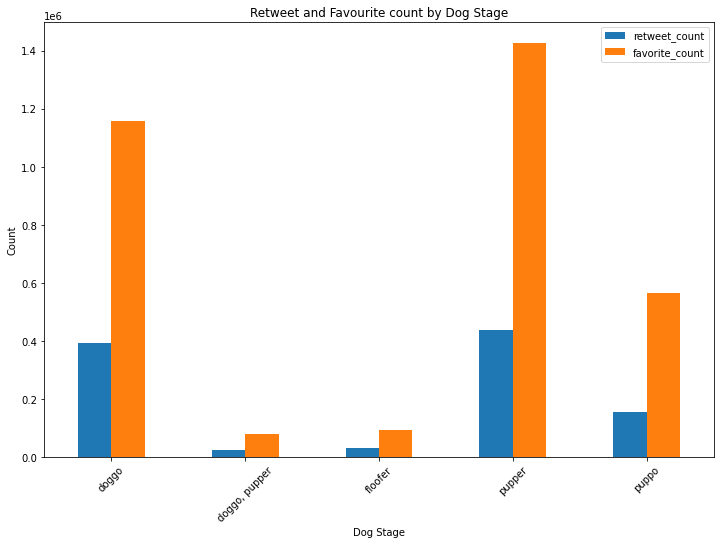

In [650]:
ax = df.groupby('dog_stage').agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).plot.bar(figsize = (12,8), rot=45)
ax.set_title('Retweet and Favourite count by Dog Stage')
ax.set_xlabel('Dog Stage')
ax.set_ylabel('Count');
plt.savefig('count_by_dog_stage.jpg', dpi=300)